<a href="https://colab.research.google.com/github/tranvangaohd1994/STP_2021_2/blob/KhanhNQ/Handwirting_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val, y_val = x_train[50000:60000, :], y_train[50000:60000]
x_train, y_train = x_train[:50000, :], y_train[:50000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 45s 8ms/step - loss: 0.2751 - accuracy: 0.9250 - val_loss: 0.0718 - val_accuracy: 0.9816
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0611 - accuracy: 0.9824 - val_loss: 0.0550 - val_accuracy: 0.9849
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0433 - val_accuracy: 0.9876
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0245 - accuracy: 0.9935 - val_loss: 0.0401 - val_accuracy: 0.9892
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0377 - val_accuracy: 0.9883
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0482 - val_accuracy: 0.9866
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0450 - val_ac

In [ ]:
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


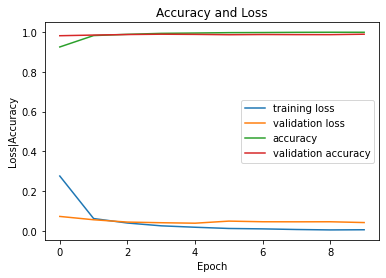

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.03156713768839836, 0.9907000064849854]


9


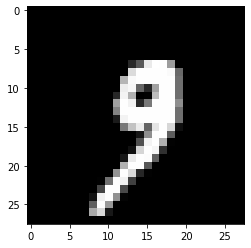

In [ ]:
number = 1000
plt.imshow(x_test[number].reshape(28, 28), cmap='gray')
y_predict = model.predict(x_test[number].reshape(1,28,28,1))
print(np.argmax(y_predict))